Code for Project

In [1]:
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from tqdm import tqdm # progress bar

nltk.download('punkt')
nltk.download('stopwords')
#  use image processing libraries like OpenCV and deep learning techniques (e.g., convolutional neural networks) to compare images.

import pandas as pd

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\allis\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\allis\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
# Give the file path
file_path1 = 'data/g_brf_sum_text_2014.tsv'
file_path2 = 'data/g_claims_2014.tsv'
file_path3 = 'data/g_application.tsv'
file_path4 = 'data/g_draw_desc_text_2014.tsv'

# Read the first few rows of the TSV file
df1 = pd.read_csv(file_path1, delimiter='\t', nrows=5)
df2 = pd.read_csv(file_path2, delimiter='\t', nrows=5)
df3 = pd.read_csv(file_path3, delimiter='\t', nrows=5)
df4 = pd.read_csv(file_path4, delimiter='\t', nrows=5)

# Step 3: Display Column Titles and Contents
# Print column titles
print("Brief Summary Column Titles:", df1.columns.tolist())
print("Claims Column Titles:", df2.columns.tolist())
print("All Applications Column Titles:", df3.columns.tolist())
print("Image Description Column Titles:", df4.columns.tolist())

# Print the first few rows of data
print("Brief Summary Data Preview:")
display(df1)

print("Claims Data Preview:")
display(df2)

print("All Applications Data Preview:")
display(df3)

print("Image Description Data Preview:")
display(df4)

Brief Summary Column Titles: ['patent_id', 'summary_text']
Claims Column Titles: ['patent_id', 'claim_sequence', 'claim_text', 'dependent', 'claim_number', 'exemplary']
All Applications Column Titles: ['application_id', 'patent_id', 'patent_application_type', 'filing_date', 'series_code', 'rule_47_flag']
Image Description Column Titles: ['patent_id', 'draw_desc_sequence', 'draw_desc_text']
Brief Summary Data Preview:


patent_id                                       summary_text
0    8621662  BACKGROUND\n\nIn extra-vehicular activity (EVA...
1    8621663  CROSS-REFERENCE TO RELATED APPLICATIONS\n\nNot...
2    8621664  FIELD OF THE INVENTION\n\nThis invention is di...
3    8621665  BACKGROUND OF THE INVENTION\n\nThe present inv...
4    8621666  STATEMENT AS TO RIGHTS TO INVENTIONS MADE UNDE...

Claims Data Preview:


patent_id  claim_sequence  \
0    8700424              48   
1    8700425               0   
2    8700425               1   
3    8700425               2   
4    8700425               3   

                                          claim_text dependent  claim_number  \
0  49. The user device of claim 38 , wherein said...  claim 38            49   
1  1. A computer implemented method of dynamicall...       NaN             1   
2  2. The computer implemented method of claim 1 ...   claim 1             2   
3  3. The computer implemented method of claim 2 ...   claim 2             3   
4  4. The computer implemented method of claim 2 ...   claim 2             4   

   exemplary  
0          0  
1          1  
2          0  
3          0  
4          0

All Applications Data Preview:


application_id  patent_id  patent_application_type filing_date  \
0        14643719   10000000                       14  2015-03-10   
1        14962323   10000001                       14  2015-12-08   
2        15107519   10000002                       15  2014-12-30   
3        14437961   10000003                       14  2013-03-12   
4        14973198   10000004                       14  2015-12-17   

   series_code  rule_47_flag  
0           14             0  
1           14             0  
2           15             0  
3           14             0  
4           14             0

Image Description Data Preview:


patent_id  draw_desc_sequence  \
0    8621662                   0   
1    8621662                   1   
2    8621662                   2   
3    8621662                   3   
4    8621662                   4   

                                      draw_desc_text  
0                  BRIEF DESCRIPTION OF THE DRAWINGS  
1  The disclosure can be further understood by re...  
2      FIG. 1A illustrates a subject donning a suit.  
3  FIG. 1B illustrates the subject with the suit ...  
4  FIG. 2A is a schematic of an adjustable should...

In [3]:
# Read only the 'patent_id' column from each file
patent_ids1 = pd.read_csv(file_path1, delimiter='\t', usecols=['patent_id'])
patent_ids2 = pd.read_csv(file_path2, delimiter='\t', usecols=['patent_id'])
patent_ids3 = pd.read_csv(file_path3, delimiter='\t', usecols=['patent_id'])

C:\Users\allis\AppData\Local\Temp\ipykernel_17348\1481996545.py:2: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  patent_ids1 = pd.read_csv(file_path1, delimiter='\t', usecols=['patent_id'])
C:\Users\allis\AppData\Local\Temp\ipykernel_17348\1481996545.py:3: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  patent_ids2 = pd.read_csv(file_path2, delimiter='\t', usecols=['patent_id'])
C:\Users\allis\AppData\Local\Temp\ipykernel_17348\1481996545.py:4: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  patent_ids3 = pd.read_csv(file_path3, delimiter='\t', usecols=['patent_id'])


In [4]:
import numpy as np
# Convert the 'patent_id' columns to sets for easy comparison
set1 = set(patent_ids1['patent_id'])
set2 = set(patent_ids2['patent_id'])
set3 = set(patent_ids3['patent_id'])
#set4 = set(patent_ids4['patent_id'])

# Step 3: Find common patent IDs
common_patents = set1.intersection(set2).intersection(set3)

# Check if there are common patent IDs and print them
if common_patents:
    print("Common patent ID(s) found:", common_patents)
else:
    print("No common patent IDs found across the three files.")

len(common_patents)

Common patent ID(s) found: {8650752, 8650753, 8650754, 8650755, 8650756, 8650757, 8650758, 8650759, 8650760, 8650761, 8650763, 8650764, 8650765, 8650766, 8650767, 8650768, 8650769, 8650770, 8650771, 8650772, 8650773, 8650774, 8650775, 8650776, 8650777, 8650778, 8650779, 8650780, 8650781, 8650782, 8650783, 8650784, 8650785, 8650786, 8650787, 8650788, 8650789, 8650790, 8650791, 8650792, 8650793, 8650794, 8650795, 8650796, 8650797, 8650798, 8650799, 8650800, 8650801, 8650802, 8650803, 8650804, 8650805, 8650806, 8650807, 8650808, 8650809, 8650810, 8650811, 8650812, 8650813, 8650814, 8650815, 8650816, 8650817, 8650818, 8650819, 8650820, 8650821, 8650822, 8650823, 8650824, 8650825, 8650826, 8650827, 8650828, 8650829, 8650830, 8650831, 8650832, 8650833, 8650834, 8650835, 8650836, 8650837, 8650838, 8650839, 8650840, 8650841, 8650842, 8650843, 8650844, 8650845, 8650846, 8650847, 8650848, 8650849, 8650850, 8650851, 8650852, 8650853, 8650854, 8650855, 8650856, 8650857, 8650858, 8650859, 8650860, 

113609

In [5]:
import re

# Function to check if a string is numeric
def is_numeric(string):
    return bool(re.match(r'^\d+$', string))

# Step 2: Read the full TSV files and preprocess 'patent_id'
df1_full = pd.read_csv(file_path1, delimiter='\t')
df2_full = pd.read_csv(file_path2, delimiter='\t')
df3_full = pd.read_csv(file_path3, delimiter='\t')

# Convert 'patent_id' columns to strings, strip whitespaces, and filter non-numeric entries
df1_full['patent_id'] = df1_full['patent_id'].astype(str).str.strip()
df1_full = df1_full[df1_full['patent_id'].apply(is_numeric)]

df2_full['patent_id'] = df2_full['patent_id'].astype(str).str.strip()
df2_full = df2_full[df2_full['patent_id'].apply(is_numeric)]

df3_full['patent_id'] = df3_full['patent_id'].astype(str).str.strip()
df3_full = df3_full[df3_full['patent_id'].apply(is_numeric)]

# Recompute the common_patents set with the filtered data
set1 = set(df1_full['patent_id'])
set2 = set(df2_full['patent_id'])
set3 = set(df3_full['patent_id'])
common_patents = set1.intersection(set2).intersection(set3)

# Step 3: Filter the DataFrames based on the new common_patents set
df1_filtered = df1_full[df1_full['patent_id'].isin(common_patents)][['patent_id', 'summary_text']]
df2_filtered = df2_full[df2_full['patent_id'].isin(common_patents)][['patent_id', 'claim_sequence', 'claim_text', 'dependent']]
df3_filtered = df3_full[df3_full['patent_id'].isin(common_patents)][['patent_id', 'application_id', 'patent_application_type', 'filing_date']]

# Step 4: Merge the DataFrames
# Merge df1 and df2 on 'patent_id'
merged_df = pd.merge(df1_filtered, df2_filtered, on='patent_id', how='inner')

# Merge the result with df3
final_df = pd.merge(merged_df, df3_filtered, on='patent_id', how='inner')

# Display the final combined DataFrame
print("Column Titles:", final_df.columns.tolist())
print("Combined Data Preview:")
display(final_df)

C:\Users\allis\AppData\Local\Temp\ipykernel_17348\412064883.py:8: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df1_full = pd.read_csv(file_path1, delimiter='\t')
C:\Users\allis\AppData\Local\Temp\ipykernel_17348\412064883.py:9: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df2_full = pd.read_csv(file_path2, delimiter='\t')
C:\Users\allis\AppData\Local\Temp\ipykernel_17348\412064883.py:10: DtypeWarning: Columns (0,1,2,4) have mixed types. Specify dtype option on import or set low_memory=False.
  df3_full = pd.read_csv(file_path3, delimiter='\t')


Column Titles: ['patent_id', 'summary_text', 'claim_sequence', 'claim_text', 'dependent', 'application_id', 'patent_application_type', 'filing_date']
Combined Data Preview:


patent_id                                       summary_text  \
0         8621662  BACKGROUND\n\nIn extra-vehicular activity (EVA...   
1         8621662  BACKGROUND\n\nIn extra-vehicular activity (EVA...   
2         8621662  BACKGROUND\n\nIn extra-vehicular activity (EVA...   
3         8621662  BACKGROUND\n\nIn extra-vehicular activity (EVA...   
4         8621662  BACKGROUND\n\nIn extra-vehicular activity (EVA...   
...           ...                                                ...   
5004010   8925111  CROSS-REFERENCE TO RELATED APPLICATION\n\nThis...   
5004011   8925111  CROSS-REFERENCE TO RELATED APPLICATION\n\nThis...   
5004012   8925111  CROSS-REFERENCE TO RELATED APPLICATION\n\nThis...   
5004013   8925111  CROSS-REFERENCE TO RELATED APPLICATION\n\nThis...   
5004014   8925111  CROSS-REFERENCE TO RELATED APPLICATION\n\nThis...   

         claim_sequence                                         claim_text  \
0                     0  1. A suit comprising: a hard upper torso provi...   
1                     1  2. A suit comprising: a hard upper torso provi...   
2                     2  3. The suit according to claim 2 , the hard up...   
3                     3  4. The suit according to claim 2 , wherein the...   
4                     4  5. The suit according to claim 2 , wherein the...   
...                 ...                                                ...   
5004010              14  15. A scanning probe microscope, comprising: a...   
5004011              15  16. The scanning probe microscope of claim 15 ...   
5004012              16  17. The scanning probe microscope of claim 15 ...   
5004013              17  18. The scanning probe microscope of claim 15 ...   
5004014              18  19. The scanning probe microscope of claim 15 ...   

        dependent application_id patent_application_type filing_date  
0             NaN       13175987                      13  2011-07-05  
1             NaN       13175987                      13  2011-07-05  
2         claim 2       13175987                      13  2011-07-05  
3         claim 2       13175987                      13  2011-07-05  
4         claim 2       13175987                      13  2011-07-05  
...           ...            ...                     ...         ...  
5004010       NaN       14140104                      14  2013-12-24  
5004011  claim 15       14140104                      14  2013-12-24  
5004012  claim 15       14140104                      14  2013-12-24  
5004013  claim 15       14140104                      14  2013-12-24  
5004014  claim 15       14140104                      14  2013-12-24  

[5004015 rows x 8 columns]

In [6]:
# Step 1: Read the fourth file
df4_full = pd.read_csv(file_path4, delimiter='\t', on_bad_lines='skip')

# Convert 'patent_id' to string and strip whitespaces
df4_full['patent_id'] = df4_full['patent_id'].astype(str).str.strip()

# Step 2: Filter df4 to include only those rows where 'patent_id' is in the combined table
common_patent_ids = set(final_df['patent_id'])  # Extracting patent IDs from the combined table
df4_filtered = df4_full[df4_full['patent_id'].isin(common_patent_ids)]

# df4_filtered now contains only the rows from the fourth file that correspond to the patents in the combined table
# Display the DataFrame
print("Image Description Data for Common Patents:")
display(df4_filtered)

C:\Users\allis\AppData\Local\Temp\ipykernel_17348\3639766829.py:2: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df4_full = pd.read_csv(file_path4, delimiter='\t', on_bad_lines='skip')


Image Description Data for Common Patents:


patent_id  draw_desc_sequence  \
0         8621662                   0   
1         8621662                   1   
2         8621662                   2   
3         8621662                   3   
4         8621662                   4   
...           ...                 ...   
3752005   8925111                   8   
3752006   8925111                   9   
3752007   8925111                  10   
3752008   8925111                  11   
3752009   8925111                  12   

                                            draw_desc_text  
0                        BRIEF DESCRIPTION OF THE DRAWINGS  
1        The disclosure can be further understood by re...  
2            FIG. 1A illustrates a subject donning a suit.  
3        FIG. 1B illustrates the subject with the suit ...  
4        FIG. 2A is a schematic of an adjustable should...  
...                                                    ...  
3752005  FIGS. 7A and 7B are side views illustrating st...  
3752006  FIGS. 8A and 8B are side views illustrating st...  
3752007  FIG. 9 is a perspective view illustrating a st...  
3752008  FIGS. 10A to 10L are schematic views sequentia...  
3752009  FIG. 11 is a flowchart showing a method of ope...  

[3751919 rows x 3 columns]

# Image Description Model

In [8]:
import tensorflow as tf
import tensorflow_hub as hub
import matplotlib.pyplot as plt
from PIL import Image
import requests
from io import BytesIO
import matplotlib.pyplot as plt
import io
import clip
import torch

In [9]:
device = "cuda" if torch.cuda.is_available() else "cpu"
clip_model, preprocess = clip.load("ViT-B/32", device=device)

100%|███████████████████████████████████████| 338M/338M [00:56<00:00, 6.32MiB/s]


In [10]:
# inception_model = tf.keras.applications.InceptionV3(include_top=False, weights='imagenet')
# new_input = inception_model.input
# hidden_layer = inception_model.layers[-1].output

# feature_extraction_model = tf.keras.Model(new_input, hidden_layer)

In [54]:
from tqdm import tqdm

# Function to process the image
def load_and_preprocess_image(image_data):
    img = Image.open(image_data)
    img = img.resize((299, 299))
    img = tf.keras.preprocessing.image.img_to_array(img)
    img = tf.keras.applications.inception_v3.preprocess_input(img)
    return img

from tqdm import tqdm

# Function to see if image matches patent description
def generate_caption_with_clip(image_tensor, descriptions, max_length=77):
    # Truncate descriptions to fit within the maximum token length
    truncated_descriptions = [desc[:max_length] for desc in tqdm(descriptions, desc="Truncating descriptions")]
    text_tokens = clip.tokenize(truncated_descriptions).to(device)

    with torch.no_grad():
        image_features = clip_model.encode_image(image_tensor)
        text_features = clip_model.encode_text(text_tokens)

        # Normalize features to unit vectors
        image_features_norm = image_features / image_features.norm(dim=-1, keepdim=True)
        text_features_norm = text_features / text_features.norm(dim=-1, keepdim=True)

        # Calculate cosine similarities
        cosine_similarities = torch.mm(text_features_norm, image_features_norm.T).squeeze(0)
        best_caption_index = cosine_similarities.argmax()
        best_caption = truncated_descriptions[best_caption_index]
        best_similarity = cosine_similarities[best_caption_index].item()

    return best_caption, best_similarity

In [47]:
# import ipywidgets as widgets
# from IPython.display import display, Image as IPImage
# from PIL import Image
# import io
# import matplotlib.pyplot as plt

# # Function to create an upload button and handle the uploaded file
# def upload_image():
#     upload_button = widgets.FileUpload(accept='image/*', multiple=False)
#     display(upload_button)

#     def on_upload_change(change):
#         if upload_button.value:
#             # Get the first uploaded file
#             uploaded_file = next(iter(upload_button.value.values()))
#             image_data = io.BytesIO(uploaded_file['content'])
            
#             # Process the image for the CLIP model
#             img_tensor = preprocess(Image.open(image_data)).unsqueeze(0).to(device)

#             # Extract descriptions from DataFrame as a list
#             descriptions = df4_filtered['draw_desc_text'].tolist()

#             # Generate a caption using CLIP
#             caption = generate_caption_with_clip(img_tensor, descriptions)

#             # Display the image and its caption
#             image = Image.open(image_data)
#             plt.imshow(image)
#             plt.axis('off')
#             plt.title(caption)
#             plt.show()

#     upload_button.observe(on_upload_change, names='data')

# upload_image()

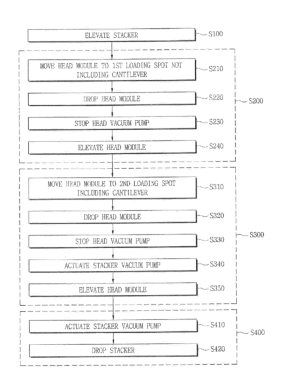

Truncating descriptions: 100%|█████████████████████████████████████████████████████| 5000/5000 [00:00<00:00, 424593.46it/s]


Caption: FIG. 1 illustrates an example storage device managing product codes using a p
Similarity: 31.15%


In [56]:
# Path to the image file in the 'data' folder
image_path = 'data/flowchart.png'  # Replace with your image filename

# Open and display the image
image = Image.open(image_path)
plt.imshow(image)
plt.axis('off')
plt.show()

# Process the image for the CLIP model
img_tensor = preprocess(image).unsqueeze(0).to(device)

# Extract descriptions from DataFrame as a list, excluding non-string types
# and select the last 1000 descriptions
descriptions = [desc for desc in df4_filtered['draw_desc_text'] if isinstance(desc, str)]
last_1000_descriptions = descriptions[-5000:]

# Generate a caption using CLIP
caption, similarity = generate_caption_with_clip(img_tensor, last_1000_descriptions)

# Display the caption and similarity
print("Caption:", caption)
print("Similarity: {:.2f}%".format(similarity * 100))

# # Check if descriptions list is empty
# if not descriptions:
#     print("No valid descriptions available.")
# else:
#     # Path to the image file in the 'data' folder
#     image_path = 'data/guitar.jpg'  # Replace with your image filename

#     # Open and display the image
#     image = Image.open(image_path)
#     plt.imshow(image)
#     plt.axis('off')
#     plt.show()

#     # Process the image for the CLIP model
#     img_tensor = preprocess(image).unsqueeze(0).to(device)

#     # Generate a caption using CLIP
#     caption = generate_caption_with_clip(img_tensor, descriptions)

#     # Display the caption
#     print("Caption:", caption)


# NLP Model

In [60]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize
import re
import ipywidgets as widgets
from IPython.display import display, clear_output

# Use only the first 1000 rows of the DataFrame for initial search
search_df = final_df.head(1000)

# Preprocess text function
def preprocess_text(text):
    stop_words = set(stopwords.words('english'))
    ps = PorterStemmer()
    words = word_tokenize(text.lower())
    return ' '.join([ps.stem(w) for w in words if w.isalpha() and w not in stop_words])

# Prepare claims data for similarity comparison
search_df['processed_claims'] = search_df['claim_text'].apply(preprocess_text)

# Set up TF-IDF Vectorizer
tfidf_vectorizer = TfidfVectorizer()
tfidf_matrix = tfidf_vectorizer.fit_transform(search_df['processed_claims'])

# Widgets for user input and output
prompt_widget = widgets.Textarea(description='Product Description:', layout={'width': '100%', 'height': '100px'})
search_button = widgets.Button(description='Find Similar Patents')
output = widgets.Output()

# Search function
def search_button_clicked(b):
    with output:
        clear_output()
        user_input = prompt_widget.value
        processed_input = preprocess_text(user_input)
        user_input_vector = tfidf_vectorizer.transform([processed_input])

        # Calculate similarities
        similarities = cosine_similarity(user_input_vector, tfidf_matrix).flatten()
        top_indexes = np.argsort(-similarities)[:10]

        for index in top_indexes:
            similarity_score = similarities[index] * 100  # Convert to percentage
            patent_info = search_df.iloc[index]
            print(f"Patent ID: {patent_info['patent_id']}\nDate: {patent_info['filing_date']}\nSimilarity Score: {similarity_score:.2f}%\nSummary: {patent_info['summary_text']}\n\n")

search_button.on_click(search_button_clicked)

# Display widgets
display(prompt_widget, search_button, output)

C:\Users\allis\AppData\Local\Temp\ipykernel_17348\3394399496.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  search_df['processed_claims'] = search_df['claim_text'].apply(preprocess_text)


Textarea(value='', description='Product Description:', layout=Layout(height='100px', width='100%'))

Button(description='Find Similar Patents', style=ButtonStyle())

Output()